<a href="https://colab.research.google.com/github/mabsoutjihad22-design/TP-MABSOUT-JIHAD/blob/main/MachineLeaning/TP1_classification_champignons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning TP1 : Reconnaissance de Champignon

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import des librairies

In [52]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image, display

from sklearn import preprocessing

from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import export_graphviz
# pd.set_option('display.max_rows', None) # Afficher toutes les lignes des dataframes
# pd.set_option('display.max_columns', None) # Afficher toutes les lignes des dataframes

### 1. Preparation des données

1.1 importer et afficher les données dans un DataFrame.

Afficher le nombre de champignons toxiques ou non.

Vérifier qu'il n'y as pas de valeurs nulles

In [53]:
# Load the dataset
df = pd.read_csv('/content/champignons.csv')

# Display the first few rows
display(df.head())

,toxicite,surface-chapeau,ecchymoses,attache-lamelles,taille-lamelles,forme-pied,surface-pied-sur-anneau,couleur-pied-sur-anneau,couleur-voile,type-anneau,population
0,toxique,lisse,oui,libre,étroit,élargissant,lisse,blanc,blanc,pendant,dispersée
1,comestible,lisse,oui,libre,large,élargissant,lisse,blanc,blanc,pendant,nombreuse
2,comestible,lisse,oui,libre,large,élargissant,lisse,blanc,blanc,pendant,nombreuse
3,toxique,écaillée,oui,libre,étroit,élargissant,lisse,blanc,blanc,pendant,dispersée
4,comestible,lisse,non,libre,large,effilé,lisse,blanc,blanc,évasé,abondante


1.2 Encoder les données avec une colonne 1/0 par valeur possible.Eviter de générer une matrice "sparse"\
Afficher la taille des données (lignes x colonnes) et les noms de colonnes générées.\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder

In [46]:
# Perform one-hot encoding using pandas get_dummies
df_encoded = pd.get_dummies(df)

# Display the size of the encoded data (rows x columns)
print("Shape of encoded data (rows x columns):", df_encoded.shape)

# Display the generated column names
print("\nGenerated column names:")
print(df_encoded.columns.tolist())

Shape of encoded data (rows x columns): (8124, 42)

Generated column names:
['toxicite_comestible', 'toxicite_toxique', 'surface-chapeau_fibreuse', 'surface-chapeau_lisse', 'surface-chapeau_rainurée', 'surface-chapeau_écaillée', 'ecchymoses_non', 'ecchymoses_oui', 'attache-lamelles_adhérent', 'attache-lamelles_libre', 'taille-lamelles_large', 'taille-lamelles_étroit', 'forme-pied_effilé', 'forme-pied_élargissant', 'surface-pied-sur-anneau_fibreuse', 'surface-pied-sur-anneau_lisse', 'surface-pied-sur-anneau_soyeuse', 'surface-pied-sur-anneau_écaillée', 'couleur-pied-sur-anneau_beige', 'couleur-pied-sur-anneau_blanc', 'couleur-pied-sur-anneau_brun', 'couleur-pied-sur-anneau_cannelle', 'couleur-pied-sur-anneau_gris', 'couleur-pied-sur-anneau_jaune', 'couleur-pied-sur-anneau_orange', 'couleur-pied-sur-anneau_rose', 'couleur-pied-sur-anneau_rouge', 'couleur-voile_blanc', 'couleur-voile_brun', 'couleur-voile_jaune', 'couleur-voile_orange', 'type-anneau_aucun', 'type-anneau_fibreux', 'type-an

1.3 Créer un nouveau DataFrame avec les données et les noms de colonne (méthode get_feature_names_out() de OneHotEncoder). Mélanger les données. Afficher le résultat.

In [6]:
# Create a new DataFrame from the encoded data
df_shuffled = df_encoded.copy()

# Shuffle the data
df_shuffled = df_shuffled.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the shuffled DataFrame
display(df_shuffled.head())

,toxicite_comestible,toxicite_toxique,surface-chapeau_fibreuse,surface-chapeau_lisse,surface-chapeau_rainurée,surface-chapeau_écaillée,ecchymoses_non,ecchymoses_oui,attache-lamelles_adhérent,attache-lamelles_libre,...,type-anneau_fibreux,type-anneau_large,type-anneau_pendant,type-anneau_évasé,population_abondante,population_clairsemée,population_dispersée,population_nombreuse,population_solitaire,population_variée
0,True,False,True,False,False,False,True,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,False,True,False,True,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,False,True,False,False,False,True,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
3,True,False,False,False,False,True,False,True,False,True,...,False,False,True,False,False,False,False,False,True,False
4,False,True,False,True,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True


1.4 Creer 4 jeux de données : train features et labels (70%) et dev features et labels (30%).\
Utiliser toxicite_toxique comme label. Ne pas garder de label (toxicite_toxique et toxicite_comestible) dans les features !

In [23]:
from sklearn.model_selection import train_test_split

# Assuming 'df_shuffled' is the DataFrame with the one-hot encoded and shuffled data
# Separate features (X) and labels (y)
X = df_shuffled.drop(['toxicite_toxique', 'toxicite_comestible'], axis=1)
y = df_shuffled['toxicite_toxique']

# Split the data into training (70%) and development (30%) sets
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data split into training and development sets.")
print("X_train shape:", X_train.shape)
print("X_dev shape:", X_dev.shape)
print("y_train shape:", y_train.shape)
print("y_dev shape:", y_dev.shape)

Data split into training and development sets.
X_train shape: (5686, 40)
X_dev shape: (2438, 40)
y_train shape: (5686,)
y_dev shape: (2438,)


## 2. Arbre de décision

2.1 Entrainer un arbre de décision sur les données d'apprentissage. Afficher l'arbre obtenu en utilisant plot_tree.

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

print("Decision Tree model trained successfully!")

Decision Tree model trained successfully!


2.2 Afficher l'arbre obtenu en utilisant graphwiz

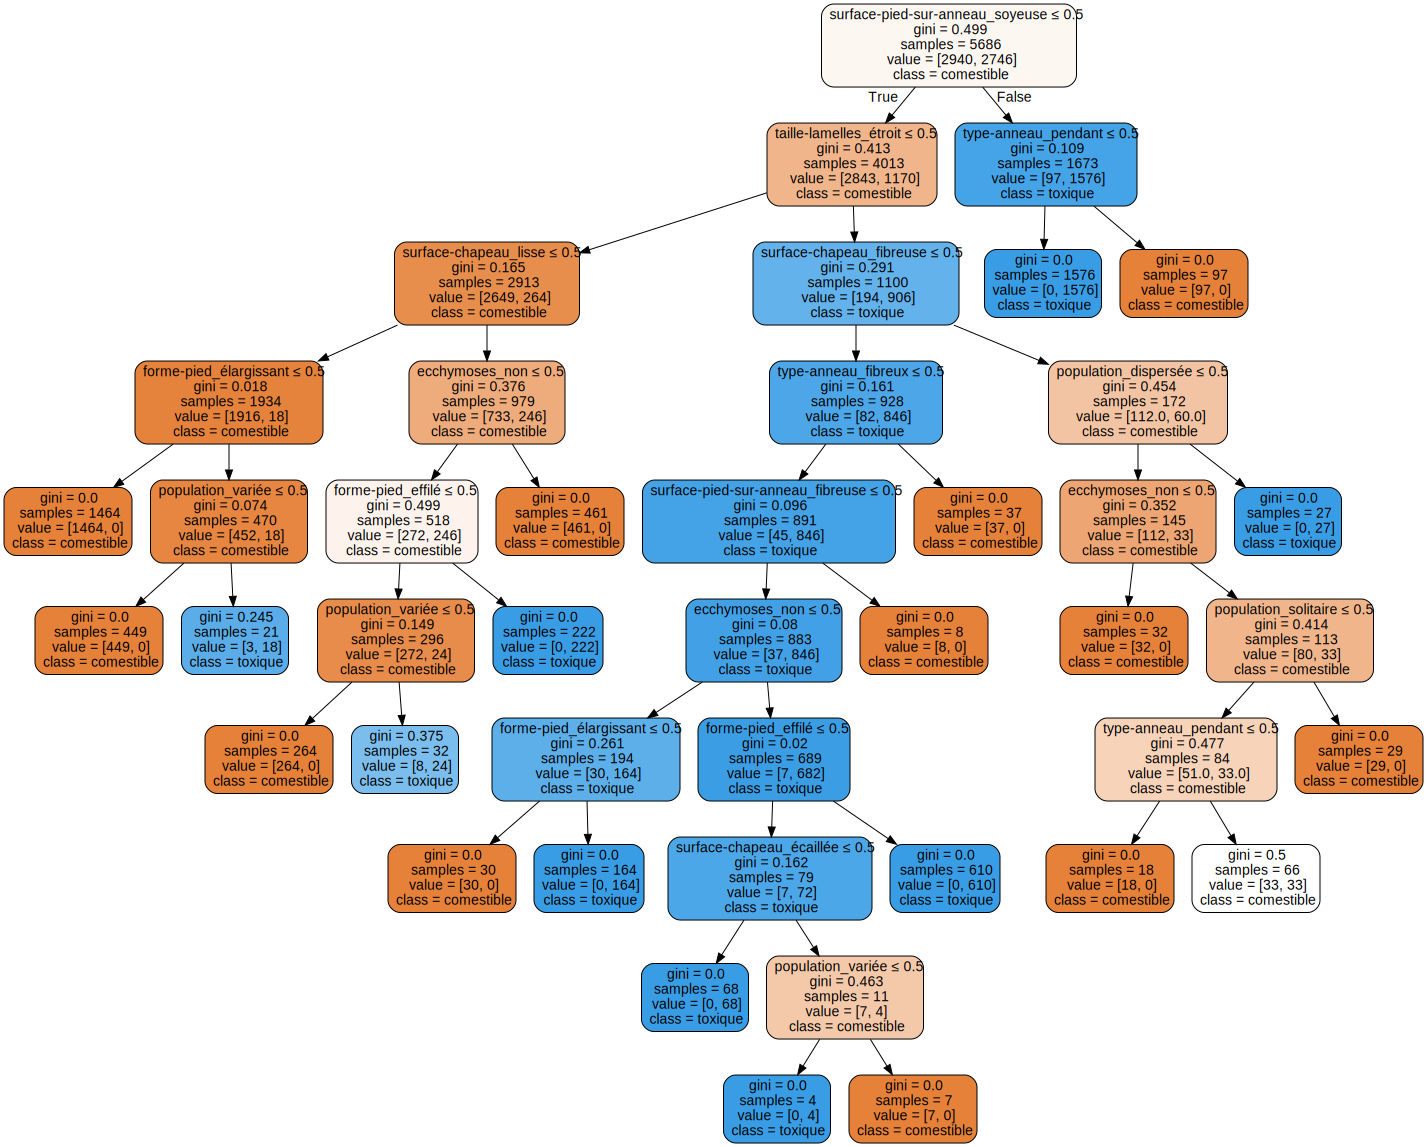

In [25]:
from sklearn.tree import export_graphviz
import graphviz
# Assuming 'dt_model' is the trained decision tree model from the previous step
# Assuming 'X_train' is the training features DataFrame
dot_data = export_graphviz(
    dt_model,
    out_file=None,
    feature_names=X_train.columns,
    class_names=['comestible', 'toxique'],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
display(graph)

2.3 Mesurer la précision du modèle sur les données de dev

In [26]:
from sklearn.metrics import accuracy_score

# Assuming 'dt_model' is the trained decision tree model
# Assuming 'X_dev' and 'y_dev' are the development features and labels

# Predict on the development set
y_pred = dt_model.predict(X_dev)

# Calculate the accuracy
accuracy = accuracy_score(y_dev, y_pred)

print(f"Accuracy of the Decision Tree model on the development set: {accuracy:.4f}")

Accuracy of the Decision Tree model on the development set: 0.9918


## 3. Modèle de forêt

3.1 Réalisez un algorithme de Random Forest sur les données. Utiliser 500 arbres et une profondeur de 6.

In [47]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=500, max_depth=6, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully!")

Random Forest model trained successfully!


3.2 Afficher trois arbres au hasard.


Displaying Tree 1:


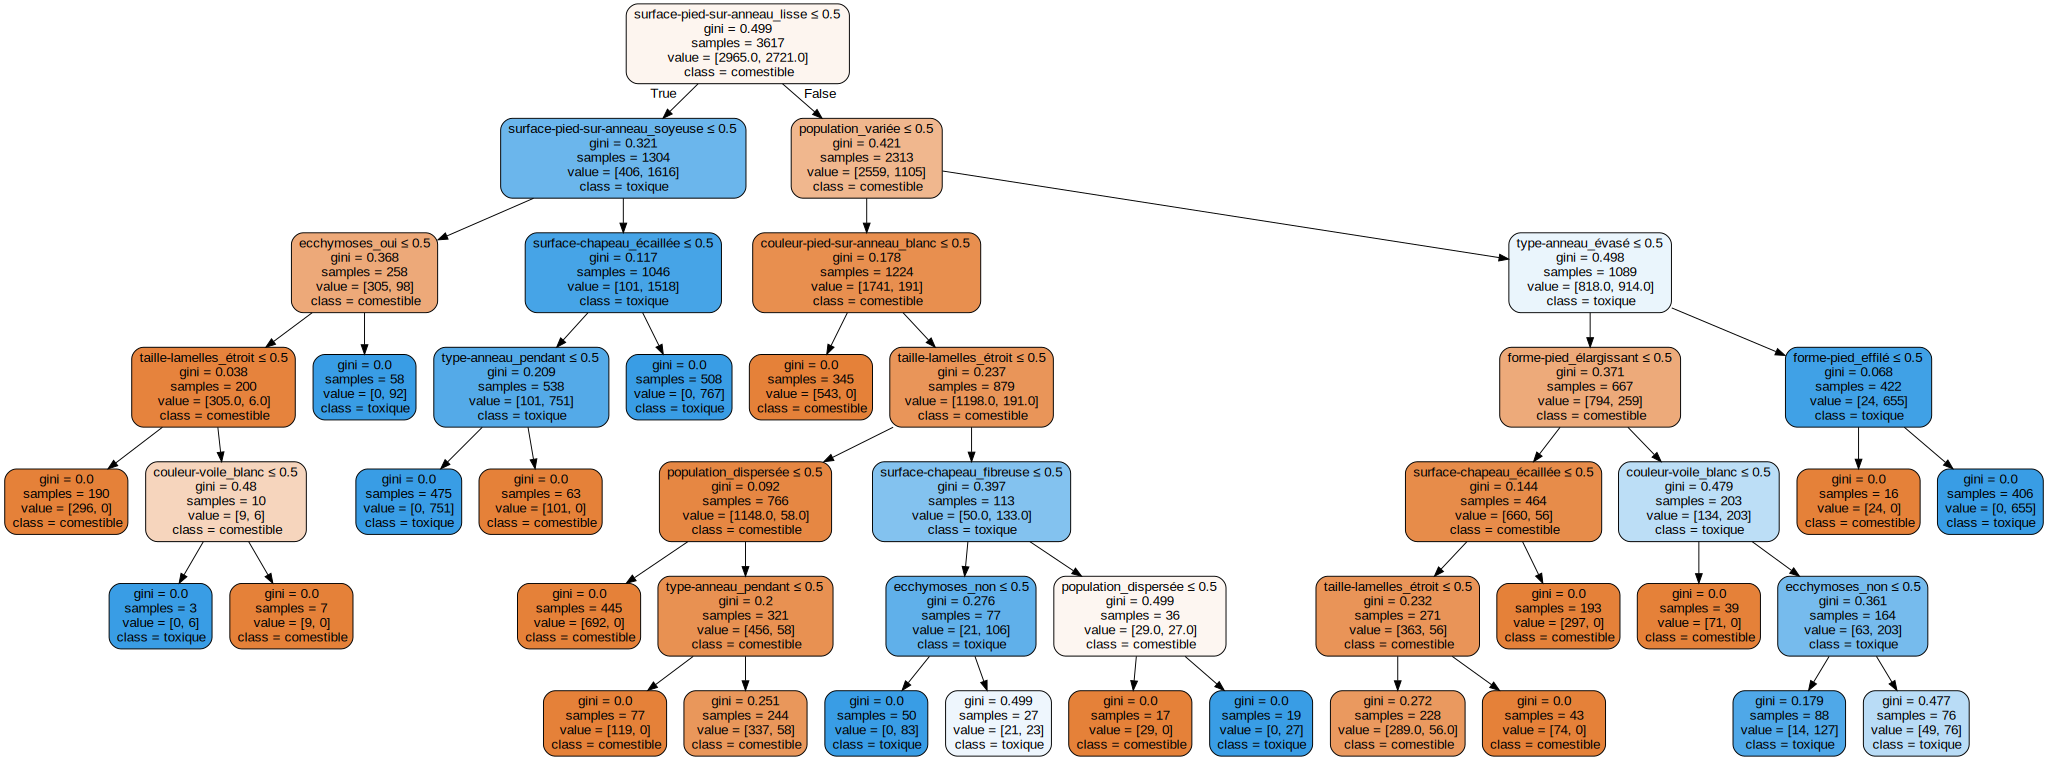


Displaying Tree 2:


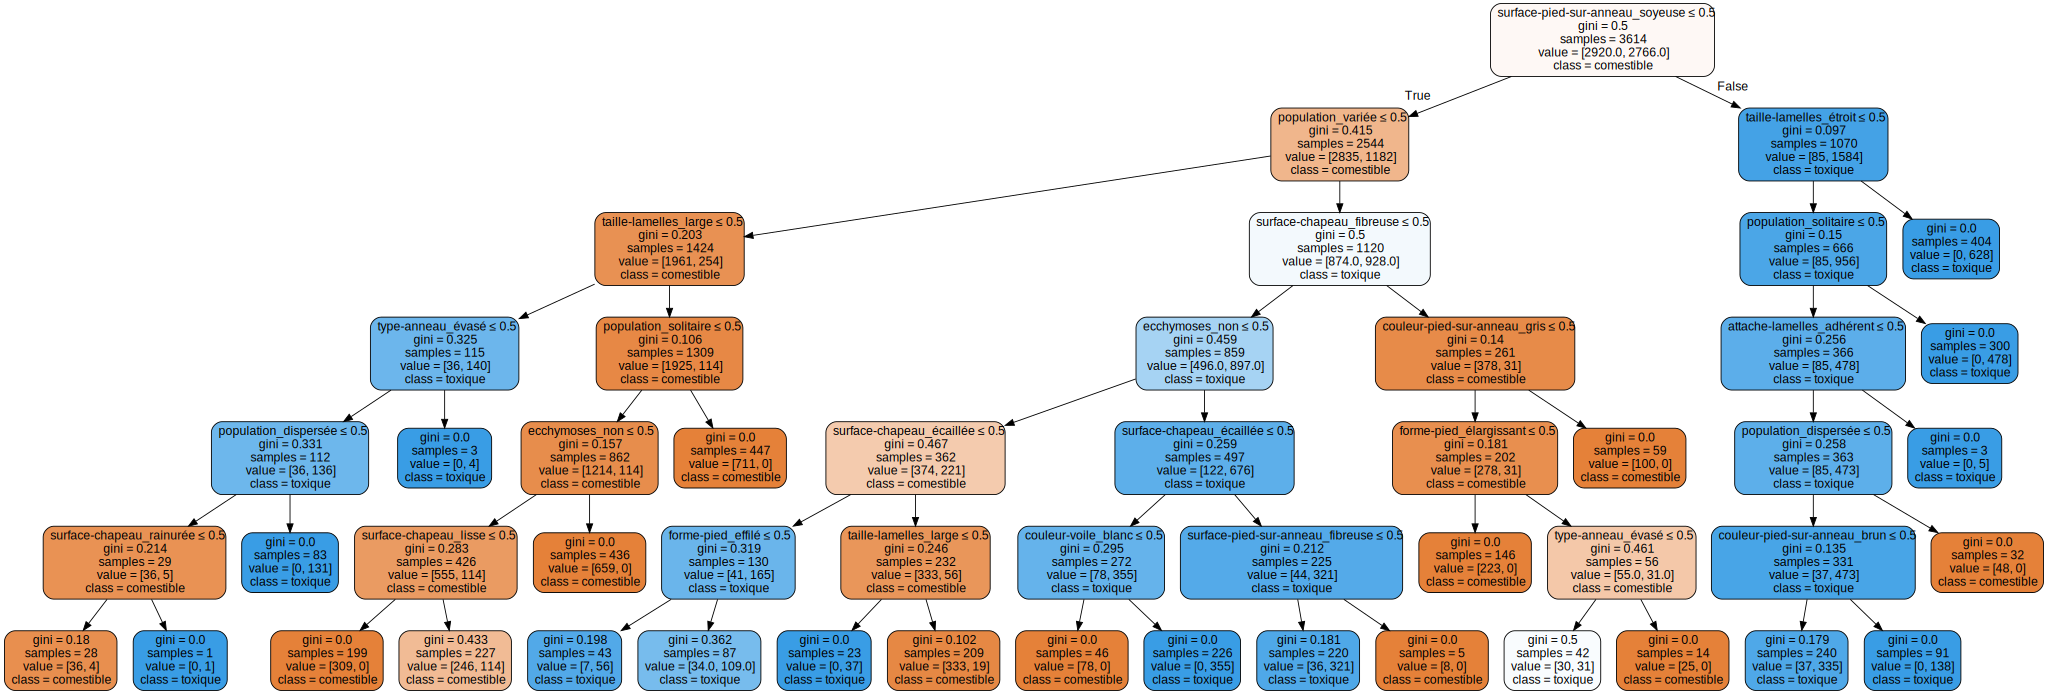


Displaying Tree 3:


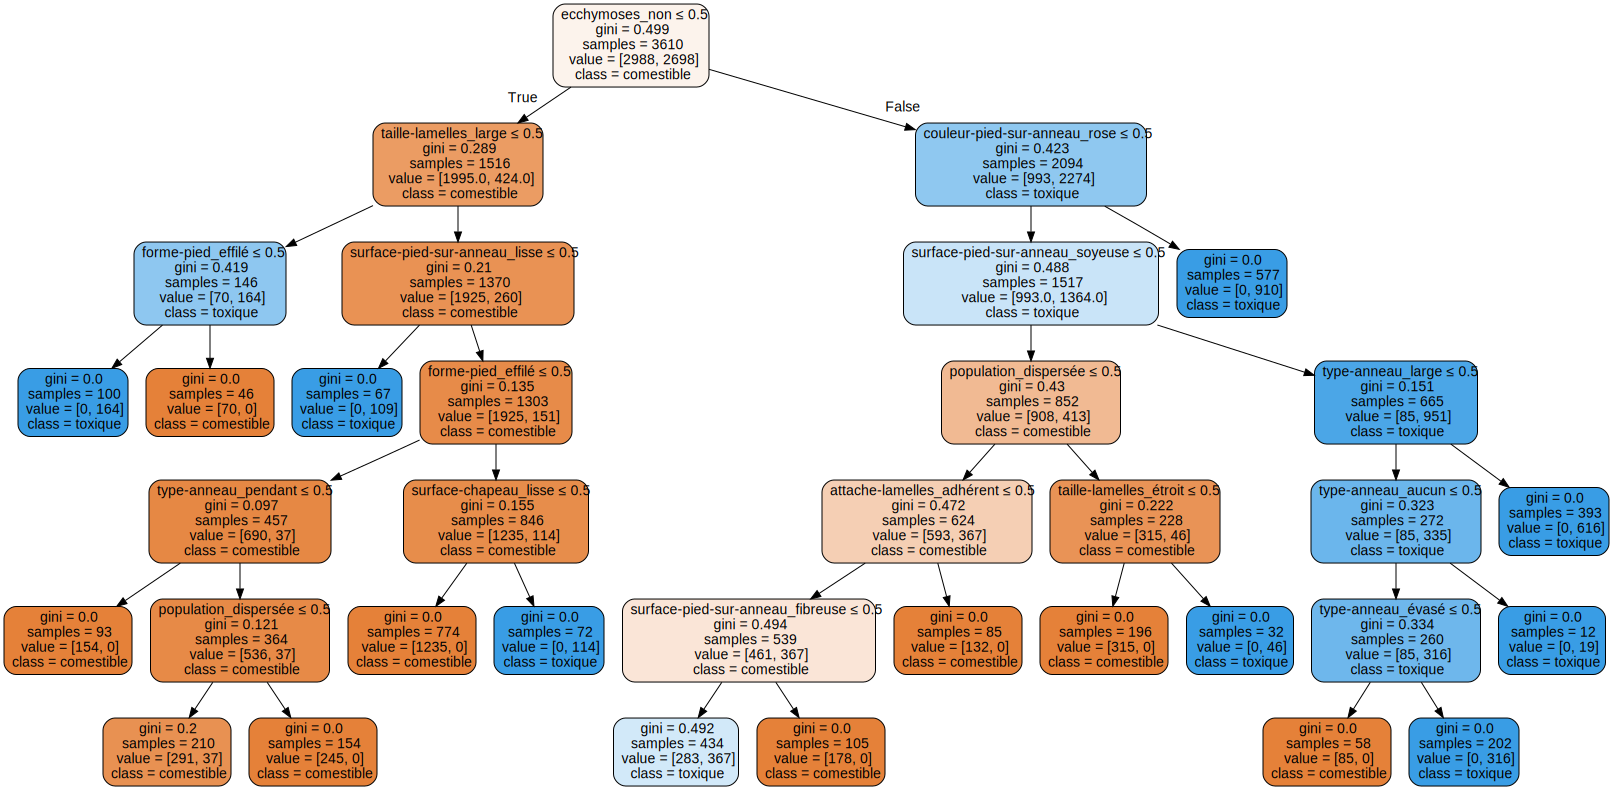

In [50]:
import random
from sklearn.tree import export_graphviz
import graphviz

# Assuming 'rf_model' is the trained Random Forest model
# Assuming 'X_train' is the training features DataFrame

# Select 3 random trees from the forest
random_indices = random.sample(range(len(rf_model.estimators_)), 3)
random_trees = [rf_model.estimators_[i] for i in random_indices]

# Display the selected trees
for i, tree in enumerate(random_trees):
    print(f"\nDisplaying Tree {i+1}:")
    dot_data = export_graphviz(
        tree,
        out_file=None,
        feature_names=X_train.columns,
        class_names=['comestible', 'toxique'],
        filled=True,
        rounded=True,
        special_characters=True
    )
    graph = graphviz.Source(dot_data)
    display(graph)

3.3 Mesurer la précision du modèle Random Forest sur les données de dev

In [29]:
from sklearn.metrics import accuracy_score

# Assuming 'rf_model' is the trained Random Forest model
# Assuming 'X_dev' and 'y_dev' are the development features and labels

# Predict on the development set
y_pred_rf = rf_model.predict(X_dev)

# Calculate the accuracy
accuracy_rf = accuracy_score(y_dev, y_pred_rf)

print(f"Accuracy of the Random Forest model on the development set: {accuracy_rf:.4f}")

Accuracy of the Random Forest model on the development set: 0.9742


## 4. optimisation des paramètres

4.1 En utilisant GridSearchCV, chercher la meilleure combinaison max_depth et n_estimator.

Afficher les paramètre du modèle et a précision obtenue.

Réexécuter un apprentissage avec la meilleure combinaison.


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'n_estimators': [100, 200, 300, 400, 500]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

print("Grid search completed.")

Grid search completed.


4.2 Afficher les paramètres optimaux et la précisions obtenue sur les données dev

In [32]:
# Assuming 'grid_search' is the GridSearchCV object trained in the previous step
# Assuming 'X_dev' and 'y_dev' are the development features and labels

# Get the best parameters
best_params = grid_search.best_params_
print("Optimal parameters found by GridSearchCV:")
print(best_params)

# Get the best estimator
best_rf_model = grid_search.best_estimator_

# Predict on the development set using the best estimator
y_pred_best_rf = best_rf_model.predict(X_dev)

# Calculate the accuracy on the development set
accuracy_best_rf = accuracy_score(y_dev, y_pred_best_rf)

print(f"\nAccuracy of the optimized Random Forest model on the development set: {accuracy_best_rf:.4f}")

Optimal parameters found by GridSearchCV:
{'max_depth': None, 'n_estimators': 100}

Accuracy of the optimized Random Forest model on the development set: 0.9918


4.3 Classer et Afficher les caractéristiques d'importance supérieure à 1%

In [33]:
import pandas as pd

# Assuming 'best_rf_model' is the best estimator from the grid search
# Assuming 'X_train' is the training features DataFrame

# Get feature importances
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': feature_importances
})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Filter features with importance > 1%
important_features = feature_importance_df[feature_importance_df['importance'] > 0.01]

print("Features with importance > 1%:")
display(important_features)

Features with importance > 1%:


,feature,importance
9,taille-lamelles_étroit,0.106896
14,surface-pied-sur-anneau_soyeuse,0.095569
8,taille-lamelles_large,0.090051
32,type-anneau_pendant,0.080921
39,population_variée,0.074094
4,ecchymoses_non,0.063487
13,surface-pied-sur-anneau_lisse,0.057339
31,type-anneau_large,0.044281
5,ecchymoses_oui,0.043736
10,forme-pied_effilé,0.043511


## 5. Stacking

Essayer différents modèles d'estimateur final

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.ensemble import StackingClassifier


## 6. Gradient Boosting

6. Exécuter un apprentissage de Gradient Boosting avec et sans "Early Stopping" sur le nombre d'estimateurs. Comparer avec le résultat sur les données dev.

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Train Gradient Boosting model without early stopping
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Predict and evaluate without early stopping
y_pred_gb = gb_model.predict(X_dev)
accuracy_gb = accuracy_score(y_dev, y_pred_gb)
print(f"Accuracy of Gradient Boosting model without early stopping: {accuracy_gb:.4f}")

# Train Gradient Boosting model with early stopping
# We will use a validation set from the training data for early stopping
X_train_es, X_val_es, y_train_es, y_val_es = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

gb_model_es = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=42, validation_fraction=0.2, n_iter_no_change=5, tol=0.01, verbose=1)
gb_model_es.fit(X_train_es, y_train_es) # Removed eval_set

# Predict and evaluate with early stopping
y_pred_gb_es = gb_model_es.predict(X_dev)
accuracy_gb_es = accuracy_score(y_dev, y_pred_gb_es)
print(f"Accuracy of Gradient Boosting model with early stopping: {accuracy_gb_es:.4f}")

# Compare results
print("\nComparison of Gradient Boosting models:")
print(f"Accuracy without early stopping: {accuracy_gb:.4f}")
print(f"Accuracy with early stopping: {accuracy_gb_es:.4f}")

Accuracy of Gradient Boosting model without early stopping: 0.9770
      Iter       Train Loss   Remaining Time 
         1           1.2368            1.99s
         2           1.1156            2.14s
         3           1.0149            2.14s
         4           0.9297            2.18s
         5           0.8570            2.17s
         6           0.7955            2.16s
         7           0.7412            2.14s
         8           0.6945            2.12s
         9           0.6544            2.09s
        10           0.6171            2.09s
        20           0.3799            2.03s
        30           0.2769            2.04s
        40           0.2322            2.12s
        50           0.2076            2.05s
Accuracy of Gradient Boosting model with early stopping: 0.9651

Comparison of Gradient Boosting models:
Accuracy without early stopping: 0.9770
Accuracy with early stopping: 0.9651


## 7. (Optionnel) Recommencer les exercices précédents en utilisant les "ordinal encoders". Que remarquez-vous ?

In [36]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize the Ordinal Encoder
# Use unknown_value and handle_unknown to manage potential new categories in test data
# Set encoded_missing_value to -1 to represent missing values after encoding
ordinal_encoder = OrdinalEncoder(unknown_value=-1, handle_unknown='use_encoded_value')

# Apply ordinal encoding to the DataFrame.
# We need to select the columns to encode, excluding the target column 'toxicite'.
# A copy is made to avoid SettingWithCopyWarning.
df_encoded_ordinal = df.copy()
categorical_columns = df_encoded_ordinal.select_dtypes(include=['object']).columns
# Exclude the target column from encoding
categorical_columns = categorical_columns.drop('toxicite')
df_encoded_ordinal[categorical_columns] = ordinal_encoder.fit_transform(df_encoded_ordinal[categorical_columns])

# Display the first few rows of the ordinally encoded DataFrame
print("Ordinally encoded data:")
display(df_encoded_ordinal.head())

# Display the size of the encoded data (rows x columns)
print("\nShape of encoded data (rows x columns):", df_encoded_ordinal.shape)

Ordinally encoded data:


,toxicite,surface-chapeau,ecchymoses,attache-lamelles,taille-lamelles,forme-pied,surface-pied-sur-anneau,couleur-pied-sur-anneau,couleur-voile,type-anneau,population
0,toxique,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,2.0
1,comestible,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0
2,comestible,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0
3,toxique,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,2.0
4,comestible,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0



Shape of encoded data (rows x columns): (8124, 11)
